<a href="https://colab.research.google.com/github/ykanematsu/reaxfit/blob/main/reaxfit_sample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ReaxFF sample
- A sample notebook for [reaxfit](https://github.com/ykanematsu/reaxfit).
- Potential energy curve for dissociation of a carbon monoxide on covalt surface.
- ~10 min including the installation on colab.

## Install

In [1]:
!pip install -q condacolab
import condacolab
condacolab.install()

⏬ Downloading https://github.com/jaimergp/miniforge/releases/latest/download/Mambaforge-colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:30
🔁 Restarting kernel...


wait for session restarting

In [1]:
%cd /content/
!git clone https://github.com/ykanematsu/reaxfit

/content
Cloning into 'reaxfit'...
remote: Enumerating objects: 94, done.
remote: Counting objects: 100% (94/94), done.
remote: Compressing objects: 100% (61/61), done.
remote: Total 94 (delta 36), reused 74 (delta 24), pack-reused 0
Unpacking objects: 100% (94/94), 23.94 KiB | 662.00 KiB/s, done.


In [2]:
%cd /content/reaxfit/example/CoCO/

/content/reaxfit/example/CoCO


In [3]:
!mamba install -q -y -c conda-forge lammps
!mamba install -q -y scipy numpy


                  __    __    __    __
                 /  \  /  \  /  \  /  \
                /    \/    \/    \/    \
███████████████/  /██/  /██/  /██/  /████████████████████████
              /  / \   / \   / \   / \  \____
             /  /   \_/   \_/   \_/   \    o \__,
            / _/                       \_____/  `
            |/
        ███╗   ███╗ █████╗ ███╗   ███╗██████╗  █████╗
        ████╗ ████║██╔══██╗████╗ ████║██╔══██╗██╔══██╗
        ██╔████╔██║███████║██╔████╔██║██████╔╝███████║
        ██║╚██╔╝██║██╔══██║██║╚██╔╝██║██╔══██╗██╔══██║
        ██║ ╚═╝ ██║██║  ██║██║ ╚═╝ ██║██████╔╝██║  ██║
        ╚═╝     ╚═╝╚═╝  ╚═╝╚═╝     ╚═╝╚═════╝ ╚═╝  ╚═╝

        mamba (1.0.0) supported by @QuantStack

        GitHub:  https://github.com/mamba-org/mamba
        Twitter: https://twitter.com/QuantStack

█████████████████████████████████████████████████████████████

  Package                   Version  Build                  Channel                   Size
───────────────────────

In [4]:
!pip3 install git+https://github.com/ykanematsu/reaxfit.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/ykanematsu/reaxfit.git to /tmp/pip-req-build-r_w70mqi
  Running command git clone --filter=blob:none --quiet https://github.com/ykanematsu/reaxfit.git /tmp/pip-req-build-r_w70mqi
  Resolved https://github.com/ykanematsu/reaxfit.git to commit 2f379f011e821a430fe5b8a354488c81b1c020b3
  Preparing metadata (setup.py) ... done
  Created wheel for reaxfit: filename=reaxfit-0.0.9-py3-none-any.whl size=4714 sha256=8173fef6bde99792386ea48901b0f30dd83f81b98d243ab8d74ed19fafb4ce2f
  Stored in directory: /tmp/pip-ephem-wheel-cache-volqt_ph/wheels/de/e0/72/9d6921cab8baf75b55a808910cbd070078c5d6db71f30b46b0
Successfully built reaxfit


## Run Fitting


In [21]:
from reaxfit import reaxfit
reax=reaxfit()
reax.config(workers=2,bound=0.08)
@reax.set_eval
def my_eval(pes,fns,refE,refF):
  pes-=pes[0]
  pes*=0.043364124
  pes-=refE
  return pes@pes
result=reax.fit(my_eval)
print("optimized paramters: ",result.x)

read config.json
initial 3 parameters : [2.40512, 6.41168, 2.04134]
differential_evolution step 1: f(x)= 0.158476
differential_evolution step 2: f(x)= 0.158476
differential_evolution step 3: f(x)= 0.081845
differential_evolution step 4: f(x)= 0.081845
differential_evolution step 5: f(x)= 0.081845
differential_evolution step 6: f(x)= 0.0713867
differential_evolution step 7: f(x)= 0.0703601
differential_evolution step 8: f(x)= 0.0693205
differential_evolution step 9: f(x)= 0.0693205
differential_evolution step 10: f(x)= 0.0643847
differential_evolution step 11: f(x)= 0.0643847
differential_evolution step 12: f(x)= 0.0643847
differential_evolution step 13: f(x)= 0.0636939
differential_evolution step 14: f(x)= 0.0636939
differential_evolution step 15: f(x)= 0.0636939
differential_evolution step 16: f(x)= 0.0630542
differential_evolution step 17: f(x)= 0.0630542
differential_evolution step 18: f(x)= 0.0630542
differential_evolution step 19: f(x)= 0.0630542
differential_evolution step 20: f(

In [22]:
# print the resulting energies
pes,fns=reax.reax(reax.x0) # energies for initial parameters
pes-=pes[0]
pes*=0.043364124
E=reax.E # the fitted energies
E-=E[0]
E*=0.043364124
print(E)

array([0.        , 0.1127928 , 0.57606361, 2.33396203, 1.26358668,
       1.40526863, 1.05006819])

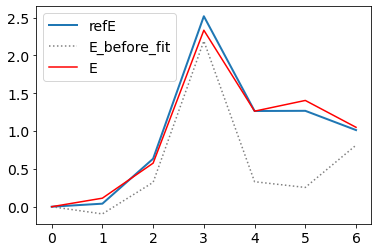

In [24]:
# compare the reference energy (by VASP) and the fitted energy (by ReaxFF)
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14
plt.plot(reax.refE,label="refE",lw=2)
plt.plot(pes,ls=":",label="E_before_fit",color="gray")
plt.plot(E,label="E",color="red")
plt.legend()
plt.show()